In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def mean_squared_error(Y_true, Y_pred):
    return np.mean((Y_true-Y_pred)**2)

In [5]:
def add_intercept(X):
    intercept=np.ones((X.shape[0], 1))
    X_with_intercept=np.concatenate((intercept, X), axis=1)
    return X_with_intercept


In [16]:
def fit_linear_regression(X, y):
    X=add_intercept(X)
    weights=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return weights


In [10]:
def predict(X, weights):
    X=add_intercept(X)
    return X.dot(weights)

In [11]:
def plot_preds(X, Y_true, Y_pred):
    plt.scatter(X, Y_true, color='blue', label='Actual Values')
    plt.scatter(X, Y_pred, color='red', label='Predicted Values', alpha=0.5)
    plt.xlabel('Feature')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [ ]:
def normalize_features(X):
    return (X-X.mean(axis=0))/ X.std(axis=0)

Mean Squared Error on Test Set: 17734868.604885586


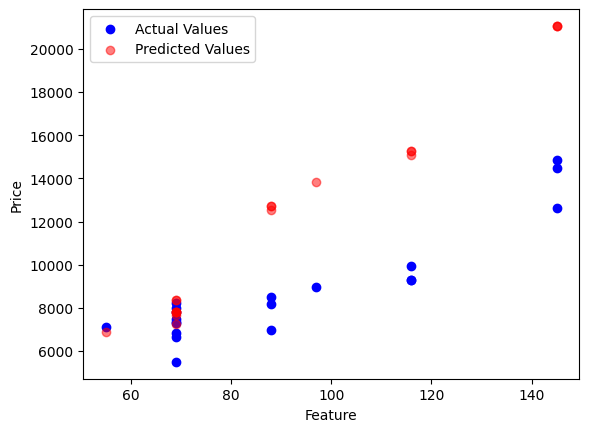

Mean Squared Error on Test Set: 88872953.1459576


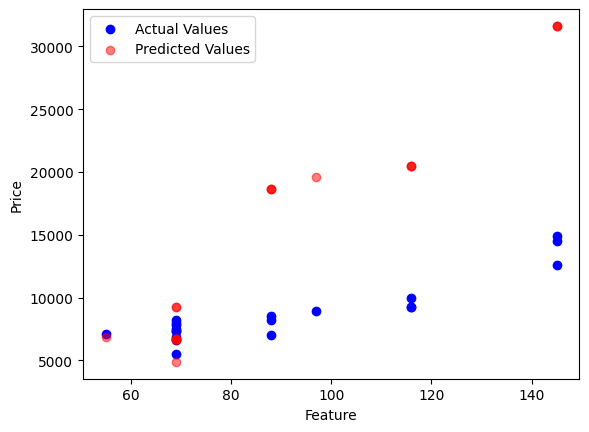

In [17]:
if __name__ == "__main__":
    # Load the train data
    train_data = pd.read_csv('train.csv')
    
    X_train = train_data[['carlength', 'carwidth', 'carheight', 'horsepower', 'peakrpm']].values
    y_train = train_data['price'].values

    test_data = pd.read_csv('test.csv')
    
    X_test = test_data[['carlength', 'carwidth', 'carheight', 'horsepower', 'peakrpm']].values
    y_test = test_data['price'].values


    ############# Without normailzed features ################
    weights = fit_linear_regression(X_train, y_train)
    
    y_pred = predict(X_test, weights)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error on Test Set: {mse}")
    
    plot_preds(test_data['horsepower'].values, y_test, y_pred)
    
    ################### Normalize features ######################
    X_train = normalize_features(X_train)
    
    weights = fit_linear_regression(X_train, y_train)
    X_test = normalize_features(X_test)
    
    y_pred = predict(X_test, weights)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error on Test Set: {mse}")
    
    plot_preds(test_data['horsepower'].values, y_test, y_pred)